In [ ]:
## Importamos las bibliotecas necesarias
import torch
import torch.nn as nn
import torchvision
import torch.utils.data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

#**Preprocesamiento de los datos**

In [ ]:
## Guardamos el dataset e imprimimos sus dimensiones
filename = 'Obesity_dataset.csv'
dataimc = pd.read_csv(filename, header = 0)
print(dataimc.shape)  ## 2111 observaciones, 17 variables (16 predictores, 1 resp)
dataimc.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
## Vemos la dimension del dataset y el tamaño de la muestra
samples, n_features = dataimc.to_numpy().shape
print(samples, n_features)  ## 2111 datos, 17 variables 

## Extraemos el numero de clases de la variable objetivo
clases = np.sort(dataimc['NObeyesdad'].unique()) ##7 clases
print(clases)

2111 17
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [ ]:
### Hacemos un OrdinalEncoder para las variables de mas de dos niveles

##CAEC
encoder = OrdinalEncoder(categories=[["no","Sometimes", "Frequently","Always"]])
encoder.fit(dataimc[["CAEC"]])
dataimc["CAEC_enc"] = encoder.transform(dataimc[["CAEC"]])

##CALC
encoder = OrdinalEncoder(categories=[["no","Sometimes", "Frequently","Always"]])
encoder.fit(dataimc[["CALC"]])
dataimc["CALC_enc"] = encoder.transform(dataimc[["CALC"]])

## Transporte
encoder = OrdinalEncoder(categories=[["Walking","Public_Transportation",
                                      "Bike","Motorbike","Automobile"]])
encoder.fit(dataimc[["MTRANS"]])
dataimc["MTRANS_enc"] = encoder.transform(dataimc[["MTRANS"]])

In [ ]:
### Utilizamos dummies para las variables de dos niveles

##Genero
dataimc = pd.get_dummies(dataimc, columns = ["Gender"], drop_first = True)

## Historial
dataimc = pd.get_dummies(dataimc, columns = ["family_history_with_overweight"], drop_first = True)

## FAVC
dataimc = pd.get_dummies(dataimc, columns = ["FAVC"], drop_first = True)
                         
## SMOKE
dataimc = pd.get_dummies(dataimc, columns = ["SMOKE"], drop_first = True)

## SCC
dataimc = pd.get_dummies(dataimc, columns = ["SCC"], drop_first = True)

In [ ]:
### Eliminamos las columnas redundantes
dataimc = dataimc.drop(['CAEC','CALC','MTRANS'], axis=1)
samples, n_features = dataimc.to_numpy().shape
print(samples, n_features)

2111 17


In [ ]:
dataimc.head(10)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,CAEC_enc,CALC_enc,MTRANS_enc,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1.0,0.0,1.0,0,1,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1.0,1.0,1.0,0,1,0,1,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1.0,2.0,1.0,1,1,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1.0,2.0,0.0,1,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1.0,1.0,1.0,1,0,0,0,0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,Normal_Weight,1.0,1.0,4.0,1,0,1,0,0
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,Normal_Weight,1.0,1.0,3.0,0,1,1,0,0
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,Normal_Weight,1.0,1.0,1.0,1,0,0,0,0
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,Normal_Weight,1.0,2.0,1.0,1,1,1,0,0
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,Normal_Weight,1.0,0.0,1.0,1,1,1,0,0


In [ ]:
## Reducimos la variable respuesta a dos categorias
## 0 si no tiene obesidad, 1 si la tiene
def my_recode(NObeyesdad):
    if NObeyesdad == "Obesity_Type_I" or NObeyesdad == "Obesity_Type_III" or NObeyesdad== "Obesity_Type_II":
        return 1
    else:
        return 0

In [ ]:
dataimc['Obesity_Yes'] = dataimc['NObeyesdad'].apply(my_recode)
dataimc = dataimc.drop(["NObeyesdad"], axis = 1)
dataimc.head(10)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_enc,CALC_enc,MTRANS_enc,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,Obesity_Yes
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0,1.0,1.0,0,1,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1,1,0,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1.0,2.0,0.0,1,0,0,0,0,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,0,0
5,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0,1.0,1.0,4.0,1,0,1,0,0,0
6,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,3.0,0,1,1,0,0,0
7,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0,1.0,1.0,1.0,1,0,0,0,0,0
8,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,1,1,1,0,0,0
9,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0,1.0,0.0,1.0,1,1,1,0,0,0


In [ ]:
## Vemos la dimension del dataset y el tamaño de la muestra despues de las recod
samples, n_features = dataimc.to_numpy().shape
print(samples, n_features)  ## 2111 datos, 17 variables 

## Extraemos el numero de clases de la variable objetivo
clases = np.sort(dataimc['Obesity_Yes'].unique()) ##7 clases
print(clases)

2111 17
[0 1]


#**Análisis estadístico**

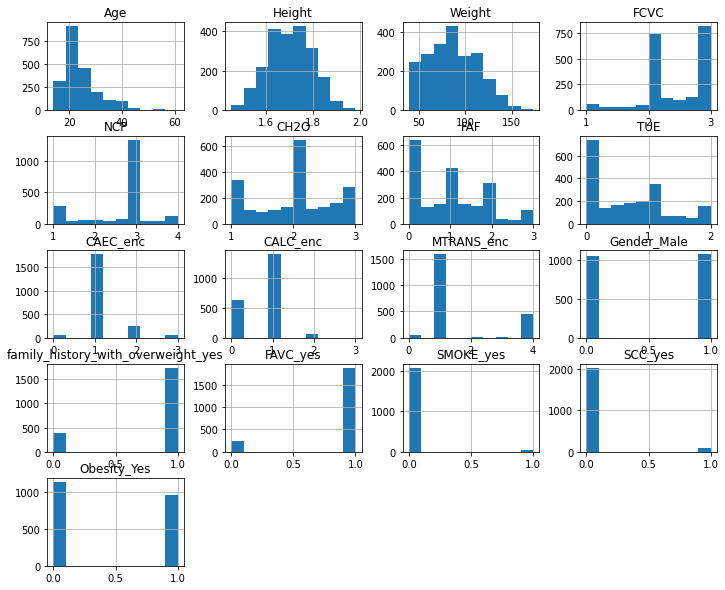

In [ ]:
##Histogramas y barras
%matplotlib inline
dataimc.hist(figsize=[12,10])
plt.show()

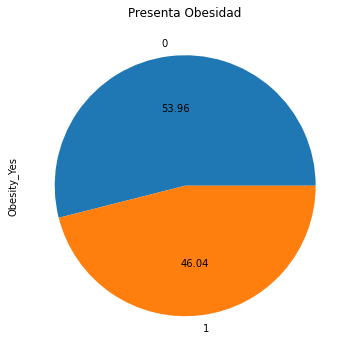

In [ ]:
#Grafica de pay para la variable respuesta
dataimc['Obesity_Yes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Presenta Obesidad')

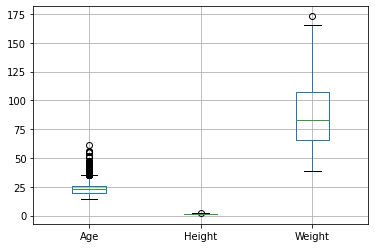

In [ ]:
#Boxplots para las variables numericas
dataimc.boxplot(column=['Age','Height','Weight'])

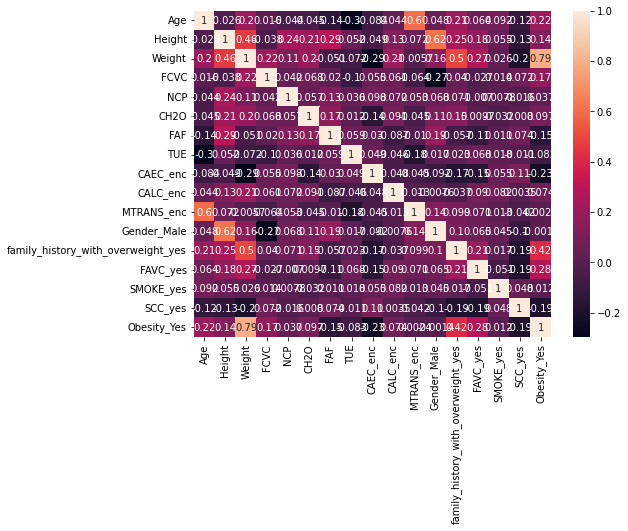

In [ ]:
## Matriz de correlacion
matrix_corr = dataimc.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True)
plt.show()

#Particion del entrenamiento - prueba

In [ ]:
miau = np.random.rand(len(dataimc)) < 0.666 #2/3 entrenamiento
training_data = dataimc[miau]
test_data = dataimc[~miau]
print(training_data.shape)  ##Nos quedamos con 1404 de entrenamiento
print(test_data.shape)      ##707 de prueba

(1404, 17)
(707, 17)


#Clase Data set 

In [ ]:
from torch.utils.data import Dataset

class DataframeDataset(Dataset):

  def __init__(self, data, y_name, transform=None, target_transform=None):
    '''
      data: pandas.DataFrame
    '''
    self.Y = torch.tensor(data[y_name].to_numpy(), dtype=torch.long)
    aux = data.drop(y_name, axis=1).to_numpy()
    self.X = torch.from_numpy(aux).to(dtype=torch.float32)
    self.transform = transform
    self.target_transform = target_transform 

  def __len__(self):
    return self.Y.size()[0]

  def __getitem__(self, idx):
    x = self.X[idx, :]
    y = self.Y[idx]
    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)
    return x, y

In [ ]:
## Transformamos los datos a objetos de la clase dataset
train_dataset = DataframeDataset(training_data, y_name='Obesity_Yes')
test_dataset = DataframeDataset(test_data, y_name='Obesity_Yes')

# Validación

In [ ]:
evens = list(range(0, len(test_dataset), 2))
odds = list(range(1, len(test_dataset), 2))
val_dataset = torch.utils.data.Subset(test_dataset, evens)
test_dataset = torch.utils.data.Subset(test_dataset, odds)

In [ ]:
## Las cardinalidades de los conjuntos de prueba, validacion y entrenamiento son
n_train = len(train_dataset) #Entrenamiento original
n_val = len(val_dataset) #Validacion (conjunto de prueba)
n_test = len(test_dataset) #Prueba (conjunto de prueba)

print("Entrenamiento: ", n_train, "Prueba ", n_test, "Validacion ", n_val)

Entrenamiento:  1404 Prueba  353 Validacion  354


#Dataloader

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64 #Tamaño del match 
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  #Shuffle para tomar los batches
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)      # de forma aleatoria
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 16])
Labels batch shape: torch.Size([64])


#Declaración de la red neuronal

In [ ]:
n_features = n_features -1  ##Restamos 1 porque esa es la variable respuesta
n_clases = len(clases)   ## 2 clases
N = [64, 64]

print(n_clases, n_features)

2 16


In [ ]:
from collections import OrderedDict
from torch import nn

relu = nn.ReLU()

# Definimos la arquitectura del modelo de la red
modelo = nn.Sequential(OrderedDict([
    ('z1', nn.Linear(n_features, 64)),
    ('h1', relu),
    ('z2', nn.Linear(64, 64)),
    ('h2', relu),
    ('z3', nn.Linear(64, n_clases)),
]))

In [ ]:
## Hacemos una instancia rapida del modelo
x = torch.randn(1, n_features)
modelo(x)

tensor([[-0.0532, -0.1704]], grad_fn=<AddmmBackward0>)

In [ ]:
## Imprimimos el modelo para ver su forma
print(modelo)  #Dos capas internas con funciones ReLU y una capa de salida con dos clases
                #En todas vemos el sesgo activado

Sequential(
  (z1): Linear(in_features=16, out_features=64, bias=True)
  (h1): ReLU()
  (z2): Linear(in_features=64, out_features=64, bias=True)
  (h2): ReLU()
  (z3): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
## Instanciamos la Cross Entropy Loss
CEL = nn.CrossEntropyLoss()
yhat = torch.rand(3, 5, requires_grad = True)  ##activamos requieres_grad para los gradientes
y = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = CEL(yhat, y)
print(loss)

tensor(1.5467, grad_fn=<NllLossBackward0>)


In [ ]:
##Fijamos el criterio de minimizacion y el optimizador
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelo.parameters(), lr=5e-3, weight_decay=0.00001)

#Entrenamiento

In [ ]:
## Barra de progreso
from tqdm import tqdm

outer = tqdm(total=3, desc='Epoch', position=0)
for ii in range(3):
    inner = tqdm(total=5, desc='Batch', position=1)
    for jj in range(2):
        #do your training
        inner.update(1)
    outer.update(1)

Batch:  40%|████      | 2/5 [00:00<00:00, 600.17it/s]

Batch:  40%|████      | 2/5 [04:21<06:31, 130.64s/it]


In [ ]:
##definimos el ajuste del modelo para los pasos que se haran por epoca

import torch.nn.functional as F

def modelfit(modelo, dataloader, optimizer, criterion, pbar, train=True):
  running_loss = 0.0  ##Iniciamos la perdida en cero
  correct = 0
  total = 0
  for i, data in enumerate(dataloader, 0):
    X, Y = data
    if train:
      optimizer.zero_grad() # Para no guardar el gradiente pasado
    pred = modelo(X) # forward pass 
    loss = criterion(pred, Y) # evaluacion para la prediccion respecto a la CEL
    if train:
      loss.backward() # calculo de derivadas
      optimizer.step() # pasos de optimizacion

    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
    probs = F.softmax(pred, 1)   ##Utilizamos la softmax para la prediccion 
    label = torch.argmax(probs, dim=1)
    correct += torch.sum(label == Y).item()
    total += Y.shape[0]
    accuracy = correct/total
        
    pbar.set_postfix(avg_loss='{:.4f}'.format(avg_loss), accuracy='{:.4f}'.format(accuracy))
    pbar.update(Y.shape[0])
  return avg_loss, accuracy

In [ ]:
## Definimos el numero de epocas para la red
import time

EPOCAS = 500   ## 500 epocas
train_time = 0

epoch_loss = []  #Inicializamos todo como listas vacias donde iremos 
epoch_acc = []   #Guardando los datos

val_loss = []
val_acc = []

In [ ]:
for epoca in range(EPOCAS):
  start_time = time.time()
  with tqdm(total=n_train, position=0) as pbar_train:
    pbar_train.set_description(f'Epoch {epoca + 1}/'+str(EPOCAS)+' - train')
    pbar_train.set_postfix(avg_loss='0.0', accuracy='0.0')
    loss_train, accuracy_train = modelfit(modelo, train_dataloader, optimizer, criterion, pbar_train)
    train_time +=  time.time() - start_time
  with tqdm(total=n_val, position=0) as pbar_val:
    pbar_val.set_description(f'Epoch {epoca + 1}/'+str(EPOCAS)+' - val')
    pbar_val.set_postfix(avg_loss='0.0', accuracy='0.0')
    loss_val, accuracy_val = modelfit(modelo, val_dataloader, optimizer, criterion, pbar_val, train=False)

  epoch_loss.append(loss_train)
  epoch_acc.append(accuracy_train)

  val_loss.append(loss_val)
  val_acc.append(accuracy_val)

print("\n --- %s seconds ---", train_time)

Epoch 473/500 - train:  36%|███▋      | 512/1404 [00:00<00:00, 9823.22it/s, accuracy=1.0000, avg_loss=0.0034]

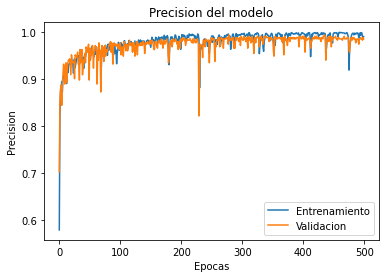

In [ ]:
#graficamos la precision con respecto al tiempo
plt.plot(epoch_acc)
plt.plot(val_acc)
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='lower right')
plt.show()

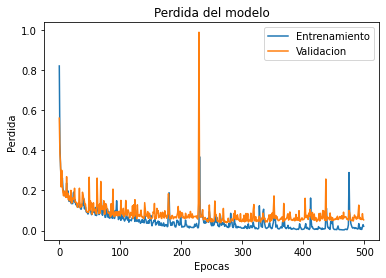

In [ ]:
## Veamos la perdida del entrenamiento y la validacion
plt.plot(epoch_loss)
plt.plot(val_loss)
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper right')
plt.show()

#Prueba de la red

In [ ]:
running_loss = 0.0
correct = 0
total = 0
modelo.eval()
for i, data in enumerate(test_dataloader, 0):
    X, Y = data   
    pred = modelo(X)
    loss = criterion(pred, Y)
    running_loss += loss.item()
    avg_loss = running_loss/(i + 1)
    probs = F.softmax(pred, 1)
    label = torch.argmax(probs, dim=1)
    correct += torch.sum(label == Y).item()
    total += Y.shape[0]
    accuracy = correct/total
        
print('Precision: {}, Perdida: {}'.format(accuracy, avg_loss))

Precision: 0.9830028328611898, Perdida: 0.05749725949645104
